In [74]:
# import modules 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import ticker

# *`Read the data`*

In [12]:
data = pd.read_csv('Salaries-Copy1.csv')

In [13]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


# *`Data cleaning and preprocessing `*

In [15]:
X = data[['BasePay', 'OvertimePay', 'OtherPay']].copy()
y = data['TotalPayBenefits'].copy()

In [16]:
X.isnull().sum()

BasePay        609
OvertimePay      4
OtherPay         4
dtype: int64

In [17]:
y.isnull().sum()

0

In [18]:
# X.fillna(X.mean(), inplace=True)
X.fillna(value=0, inplace=True)

In [19]:
y[y==0].size

30

In [20]:
zero_salary = (y[y==0]).index

In [21]:
y.drop(index=zero_salary, axis=0, inplace=True)
X.drop(index=zero_salary, axis=0, inplace=True);

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# *`Training and prediction `*

In [23]:
lr = LinearRegression().fit(X_train, y_train) 

In [24]:
lr.intercept_

1584.3415210681706

In [25]:
pd.DataFrame(lr.coef_, X.columns, columns=['coefficients'])

,coefficients
BasePay,1.259948
OvertimePay,1.101897
OtherPay,0.906949


In [26]:
predictions = lr.predict(X_test)

# *`Visualization`*

In [87]:
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

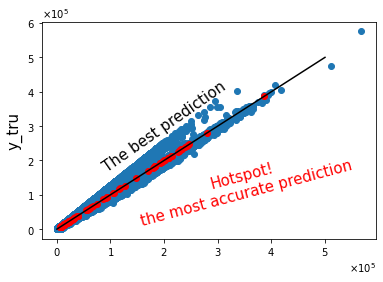

In [91]:
plt.scatter(y_test, predictions)
plt.ylabel('y_tru', fontsize=15)

plt.plot((0,5e5), (0,5e5), 'k')



plt.text(2e5, 3e5, 'The best prediction',
            fontsize=15,
            color="black",
            horizontalalignment='center',
            verticalalignment='center',
            rotation=35)

plt.text(3.5e5, 1.3e5, 'Hotspot!\nthe most accurate prediction',
            fontsize=15,
            color="red",
            horizontalalignment='center',
            verticalalignment='center',
            rotation=15)

index = np.abs(y_test-predictions)<100
plt.scatter(y_test[index], predictions[index], color='red')

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)


# *`Evaluating`*

In [182]:
print(f'MAE:  {metrics.mean_absolute_error(y_test, predictions):.3f}')
print(f'MSE:  {metrics.mean_squared_error(y_test, predictions):.3f}')
print(f'RMAE: {np.sqrt(metrics.mean_absolute_error(y_test, predictions)):.3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test, predictions):.3f}')

MAE:  10518.430
MSE:  194370716.268
RMAE: 102.559
MAPE: 1.790
